In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
db =pd.read_csv('Starbucks satisfactory survey.csv', sep=',')

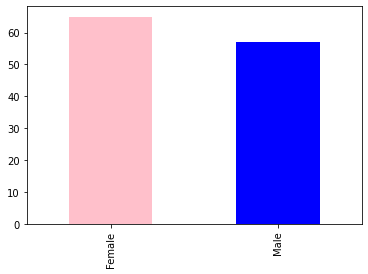

In [ ]:
#Vamos analisar o dataframe e encontrar relações para melhor conehcermos os intrevistados e insights mais precisos.
sex =db['1. Your Gender'].value_counts()
sex.plot.bar(color = ['pink','blue'])

In [ ]:
#Profissão dos entrevistados
db['3. Are you currently....?'].value_counts()

Employed         61
Student          42
Self-employed    17
Housewife         2
Name: 3. Are you currently....?, dtype: int64

In [ ]:
db.columns= ['time','sex','age','job','wage','oft','how','stay','dist','card','prod','spend','quali','price','promo','place','wifi','rate','party','media','buyer']

In [ ]:
db_drop = db.drop('time',axis=1, inplace= True)

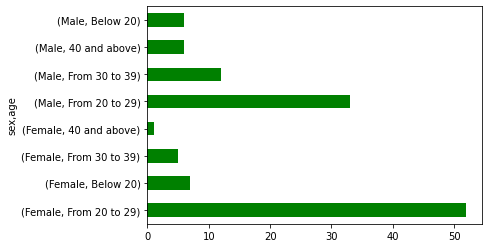

In [ ]:
#Relação sexo e idade dos clientes
sex_age = db.groupby('sex')['age'].value_counts()
sex_age.plot.barh(color = 'green')


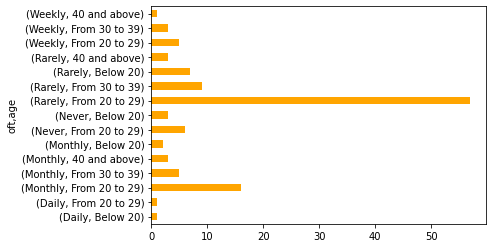

In [ ]:
# Realcionando os grupos com a frequencia que vão ao Starbucks 
age_oft = db.groupby('oft')['age'].value_counts()
age_oft.plot.barh( color='orange')

In [ ]:
db.loc[db['spend'] ==  'Less than RM20', 'spend'] = 16
db.loc[db['spend'] ==  'Around RM20 - RM40', 'spend'] = 30
db.loc[db['spend'] ==  'Zero', 'spend'] = 0
db.loc[db['spend'] ==  'More than RM40', 'spend'] = 55

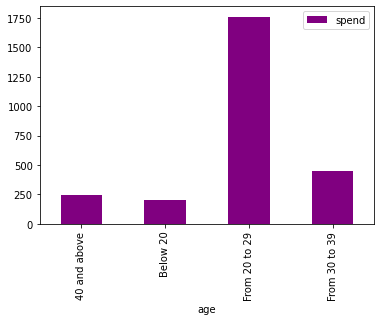

In [ ]:
#quanto consome cada grupo?
age_spend = db[['age','spend']].groupby('age').sum()
age_spend.plot.bar(color = 'purple')

In [ ]:
#como podemos ver qual grupo consome mais, podemos gerar insights sobre o que pensam, para podermos gerar mais cliente e aumentar o lucro
#Existem dois grupos mais lucráveis (from 20 to 29 e from 30 to 39)


In [ ]:
db.head(3)

,sex,age,job,wage,oft,how,stay,dist,card,prod,spend,quali,price,promo,place,wifi,rate,party,media,buyer
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,16,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,16,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,16,4,3,4,4,4,4,3,In Store displays;Billboards,Yes


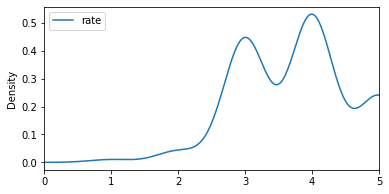

In [ ]:
#score geral
db.plot.density(y='rate',xlim=[0,5],figsize=[6,3])

In [ ]:
#Os clientes que possuem cartao Starbucks estão entre os que mais consomem
age_card = db.groupby('age')['card'].value_counts()
age_card

age            card
40 and above   Yes      4
               No       3
Below 20       No      11
               Yes      2
From 20 to 29  Yes     43
               No      42
From 30 to 39  Yes     11
               No       6
Name: card, dtype: int64

In [ ]:
#Quanto tempo permanecem na loja
db['stay'].value_counts()

Below 30 minutes                73
Between 30 minutes to 1 hour    34
Between 1 hour to 2 hours       12
More than 3 hours                2
Between 2 hours to 3 hours       1
Name: stay, dtype: int64

In [ ]:
db.loc[db['stay'] ==  'Below 30 minutes', 'stay'] = 25
db.loc[db['stay'] ==  'Between 30 minutes to 1 hour', 'stay'] = 45
db.loc[db['stay'] ==  'Between 1 hour to 2 hours', 'stay'] = 90
db.loc[db['stay'] ==  'More than 3 hours', 'stay'] = 190
db.loc[db['stay'] ==  'Between 2 hours to 3 hours', 'stay'] = 150

In [ ]:
db['stay'] = db['stay'].astype('int64')

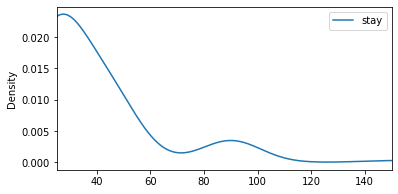

In [ ]:
#Visualisação do tempo de permanencia em loja por minuto
db.plot.density(y='stay',xlim=[25,150],figsize=[6,3])

In [ ]:
db.loc[(db['card'] == 'Yes') ,'member'] = 'High'

In [ ]:
db['member'].fillna('No', inplace=True)

In [ ]:
db.head(2)

,sex,age,job,wage,oft,how,stay,dist,card,prod,spend,quali,price,promo,place,wifi,rate,party,media,buyer,member
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,45,within 1km,Yes,Coffee,16,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes,High
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,25,1km - 3km,Yes,Cold drinks;Pastries,16,4,3,4,4,4,5,2,Social Media;In Store displays,Yes,High


In [ ]:
db['member'].value_counts()

No      62
High    60
Name: member, dtype: int64

In [ ]:
db_drop = db.drop('card',axis=1, inplace= True)

In [ ]:
db.head(2)

,sex,age,job,wage,oft,how,stay,dist,prod,spend,quali,price,promo,place,wifi,rate,party,media,buyer,member
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,45,within 1km,Coffee,16,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes,High
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,25,1km - 3km,Cold drinks;Pastries,16,4,3,4,4,4,5,2,Social Media;In Store displays,Yes,High


In [ ]:
db['stay'] = db['stay'].astype('int64')
db['spend'] = db['spend'].astype('int64')



In [ ]:
print(db.dtypes)

sex       object
age       object
job       object
wage      object
oft       object
how       object
stay       int64
dist      object
prod      object
spend      int64
quali      int64
price      int64
promo      int64
place      int64
wifi       int64
rate       int64
party      int64
media     object
buyer     object
member    object
dtype: object


In [ ]:
#Vamos avaliar as chances de novos clientes obterem o Starbucks card
previsores = db.iloc[:,0:19].values
classe = db.iloc[:,19].values

In [ ]:
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,1] = labelencoder.fit_transform(previsores[:,1])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:, 4] = labelencoder.fit_transform(previsores[:, 4])
previsores[:, 5] = labelencoder.fit_transform(previsores[:, 5])
previsores[:, 7] = labelencoder.fit_transform(previsores[:, 7])
previsores[:, 8] = labelencoder.fit_transform(previsores[:, 8])
previsores[:, 17] = labelencoder.fit_transform(previsores[:, 17])
previsores[:, 18] = labelencoder.fit_transform(previsores[:, 18])


TypeError: ignored

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 1)

In [ ]:
svm = SVC()
svm.fit(X_treinamento, y_treinamento)

In [ ]:
#o modelo encontrou 13 possiveis clientes que se interessariam pelo cartao
previsoes = svm.predict(X_teste)
previsoes

In [ ]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

In [ ]:
forest = ExtraTreesClassifier()
forest.fit(X_treinamento, y_treinamento)
importancias = forest.feature_importances_
importancias

In [ ]:
#8 10 11 12 17 18
X_treinamento2 = X_treinamento[:,[3,7,9,10,13,17,18]]
X_teste2 = X_teste[:,[3,7,9,10,13,17,18]]

In [ ]:
svm2 = SVC()
svm2.fit(X_treinamento2, y_treinamento)
previsoes2 = svm2.predict(X_teste2)
taxa_acerto = accuracy_score(y_teste, previsoes2)
taxa_acerto

In [ ]:
db.head(2)

In [ ]:
#Minha sugestao
X_treinamento3 = X_treinamento[:,[1,2,3,9,11,12,14,18]]
X_teste3 = X_teste[:,[1,2,3,9,11,12,14,18]]

In [ ]:
svm3 = SVC()
svm3.fit(X_treinamento3, y_treinamento)
previsoes3 = svm3.predict(X_teste3)
taxa_acerto = accuracy_score(y_teste, previsoes3)
taxa_acerto

In [ ]:
O modelo foi capaz de concluir com uma taxa de acerto de 0.59
com aproximadamente 13 possiveis clientes de 37 amostras

In [ ]:
##concluir##